In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model

In [6]:
df = pd.read_csv("../datasets/india-gdp-per-capita.csv", usecols = ['sdate',' GDP Per Capita (US $)', ' Annual Growth Rate (%)'])


,sdate,GDP Per Capita (US $),Annual Growth Rate (%)
0,1960-12-31,82.1886,0.00
1,1961-12-31,85.3543,3.85
2,1962-12-31,89.8818,5.30
3,1963-12-31,101.1264,12.51
4,1964-12-31,115.5375,14.25
...,...,...,...
57,2017-12-31,1980.6670,14.32
58,2018-12-31,1998.2591,0.89
59,2019-12-31,2072.2449,3.70
60,2020-12-31,1933.1011,-6.71


In [9]:
df.rename(columns = {'sdate':'Date'}, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,GDP Per Capita (US $),Annual Growth Rate (%)
0,1960-12-31,82.1886,0.00
1,1961-12-31,85.3543,3.85
2,1962-12-31,89.8818,5.30
3,1963-12-31,101.1264,12.51
4,1964-12-31,115.5375,14.25


In [10]:
df.info(verbose = False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 3 entries, Date to  Annual Growth Rate (%)
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


In [11]:
df['Year'] = df['Date'].dt.year
gdp_00 = df[["Year", " GDP Per Capita (US $)"]][df['Year'] >= 2000]
 
gdp_00

,Year,GDP Per Capita (US $)
40,2000,443.3142
41,2001,451.5730
42,2002,470.9868
43,2003,546.7266
44,2004,627.7742
45,2005,714.8610
46,2006,806.7533
47,2007,1028.3348
48,2008,998.5223
49,2009,1101.9608


In [12]:
gdp_00.info(verbose = False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 40 to 61
Columns: 2 entries, Year to  GDP Per Capita (US $)
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
gdp_00['Year'].dtype

dtype('int64')

Text(0, 0.5, 'per capita income (US$)')

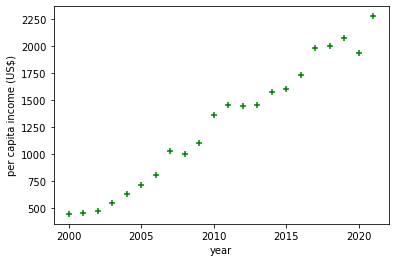

In [16]:
plt.scatter (gdp_00['Year'] , gdp_00[' GDP Per Capita (US $)'], color = 'green', marker = "+" )
plt.xlabel('year')
plt.ylabel('per capita income (US$)')

In [18]:
reg = linear_model.LinearRegression()

In [19]:
reg.fit(gdp_00[['Year']],gdp_00[[' GDP Per Capita (US $)']])

LinearRegression()

In [29]:
reg.predict(np.array([2022,2023,2024,2025]).reshape(-1,1))

# m = reg.coef_
# c = reg.intercept_
# y = m * 2020 + c

array([[2307.45758831],
       [2397.14275686],
       [2486.82792541],
       [2576.51309396]])

In [45]:
gdp_00['pred_gdp'] = reg.predict(gdp_00[['Year']])
print(gdp_00)

    Year   GDP Per Capita (US $)     pred_gdp
40  2000                443.3142   334.383880
41  2001                451.5730   424.069049
42  2002                470.9868   513.754217
43  2003                546.7266   603.439386
44  2004                627.7742   693.124554
45  2005                714.8610   782.809723
46  2006                806.7533   872.494892
47  2007               1028.3348   962.180060
48  2008                998.5223  1051.865229
49  2009               1101.9608  1141.550397
50  2010               1357.5637  1231.235566
51  2011               1458.1041  1320.920734
52  2012               1443.8824  1410.605903
53  2013               1449.6105  1500.291071
54  2014               1573.8856  1589.976240
55  2015               1605.6054  1679.661408
56  2016               1732.5542  1769.346577
57  2017               1980.6670  1859.031746
58  2018               1998.2591  1948.716914
59  2019               2072.2449  2038.402083
60  2020               1933.1011  

In [46]:
gdp_00.info(verbose = False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 40 to 61
Columns: 3 entries, Year to pred_gdp
dtypes: float64(2), int64(1)
memory usage: 704.0 bytes


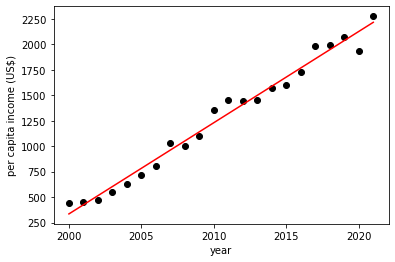

In [34]:
plt.scatter (gdp_00.Year ,gdp_00[' '], color = 'black' )
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.plot(gdp_00.Year , reg.predict(gdp_00[['Year']]) , color='red')

<code>Comparison between actual GDP and predicted GDP in respective years</code>

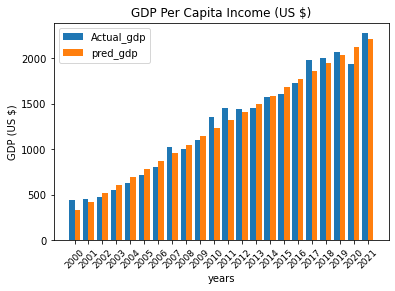

In [35]:
X = gdp_00.Year
Actual_gdp = gdp_00.iloc[: , 1]
pred_gdp = reg.predict(gdp_00[['Year']])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis- 0.2 , Actual_gdp, 0.4, label = 'Actual_gdp')
plt.bar(X_axis + 0.2, pred_gdp, 0.4, label = 'pred_gdp')
  
plt.xticks(X_axis, X, rotation = (45),  fontsize = 9 )
plt.xlabel("years")
plt.ylabel("GDP (US $)")
plt.title("GDP Per Capita Income (US $)")
plt.legend()
plt.savefig("GDP_pred.png")
plt.show()